In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [27]:
# x, v, a
def physics(process, dt = 0.1):
    new_process = np.copy(process)
    new_process[1] += dt * process[2]
    new_process[0] += dt * process[1]
    return new_process

In [28]:
def measure(process, noise = 0.1):
    return process + np.random.randn(process.shape[0]) * noise

In [29]:
def filtered(prev_filtered, process, alpha = 0.9):
    return prev_filtered * (1 - alpha) + process * alpha

In [135]:
all_data = [[], [], []]
process = np.array([0, 0, 0.])
filtered_observation = process
for i in range(1000):
    process[0] = np.sin((i + 0.01 * i * i) / 100.)
    #process = physics(process)
    observation = measure(process, 0.2)
    filtered_observation = filtered(filtered_observation, observation, 0.3)
    all_data[0].append(process[0])
    all_data[1].append(observation[0])
    all_data[2].append(filtered_observation[0])

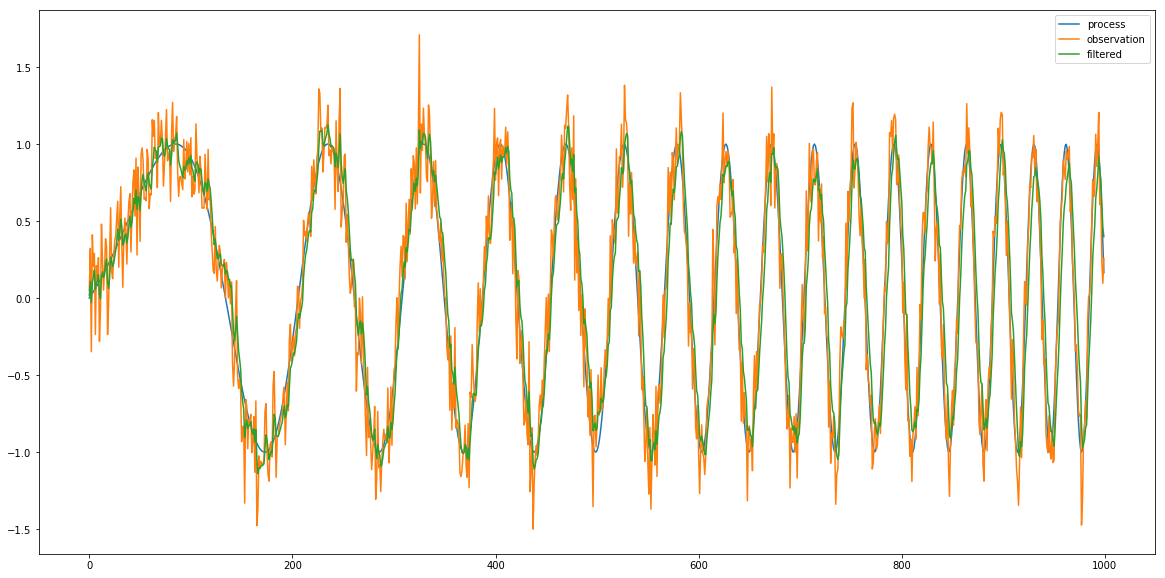

In [136]:
plt.figure(figsize = (20, 10))
plt.plot(all_data[0], label = 'process')
plt.plot(all_data[1], label = 'observation')
plt.plot(all_data[2], label = 'filtered')
plt.legend()
plt.show()